In [42]:
%pip install pandas
%pip install numpy 
%pip install statsmodels
%pip install matplotlib
%pip install sklearn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'sci

In [186]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler


In [174]:
commodities_df = pd.read_csv('all_commodities.csv')
child_etf_df = pd.read_csv('etf_data/synthetic_child_etf.csv')
adult_etf_df = pd.read_csv('etf_data/synthetic_adult_etf.csv')
etf_df = pd.read_csv('etf_data/synthetic_etf.csv')

meat_prod_raw = pd.read_csv("Meat_Stats_Meat_Production.csv")
meat_storage_raw = pd.read_csv("Meat_Stats_Cold_Storage.csv")
meat_counts_raw = pd.read_csv("Meat_Stats_Slaughter_Counts.csv")
meat_weights_raw = pd.read_csv("Meat_Stats_Slaughter_Weights.csv")
snap_df = pd.read_csv('./SNAP_data/processed_snap.csv')
acs_df = pd.read_csv('acs_national_estimations.csv') # only for the fishing categories 
adult_obesity_df = pd.read_csv('national_obesity_data/adult_obesity_data.csv')
child_obesity_df = pd.read_csv('national_obesity_data/child_obesity_data.csv')

## Process Commodities Dataset

In [175]:
commodities_df['Date-Time'] = pd.to_datetime(commodities_df['Date-Time'])
commodities_df['Year'] = commodities_df['Date-Time'].dt.year
commodities_df.dropna(inplace=True)
commodities_df = commodities_df[commodities_df['Unit'] == 'Cents per Pound']

commodities_df = commodities_df[['Value', 'Commodity', 'Year']]
commodities_df

,Value,Commodity,Year
0,203.879130,Coffee,2024
1,210.310476,Coffee,2023
2,197.433182,Coffee,2023
3,183.951364,Coffee,2023
4,183.589048,Coffee,2023
...,...,...,...
1222,14.619999,Sugar,1990
1223,15.240002,Sugar,1990
1224,15.310001,Sugar,1990
1225,14.650002,Sugar,1990


In [176]:
unique_commodities = commodities_df['Commodity'].unique()
unique_commodities
commodities_df
commodities_df[commodities_df['Commodity'] == 'Sugar']

,Value,Commodity,Year
818,22.474783,Sugar,2024
819,22.145714,Sugar,2023
820,27.309545,Sugar,2023
821,26.903636,Sugar,2023
822,26.563810,Sugar,2023
...,...,...,...
1222,14.619999,Sugar,1990
1223,15.240002,Sugar,1990
1224,15.310001,Sugar,1990
1225,14.650002,Sugar,1990


In [177]:
commodities_grouped_df = commodities_df.groupby(['Commodity', 'Year']).mean().reset_index()
commodities_grouped_df


,Commodity,Year,Value
0,Coffee,1990,89.147504
1,Coffee,1991,85.027028
2,Coffee,1992,61.737390
3,Coffee,1993,71.118638
4,Coffee,1994,147.348975
...,...,...,...
65,Sugar,2020,12.884191
66,Sugar,2021,17.856061
67,Sugar,2022,18.825534
68,Sugar,2023,24.042175


In [47]:
commodities_grouped_df = commodities_grouped_df[commodities_grouped_df['Commodity'].isin(['Sugar', 'Coffee'])]

commodities_grouped_df = commodities_grouped_df.pivot(index='Year', columns='Commodity', values='Value').reset_index()

commodities_grouped_df.columns.name = None
commodities_grouped_df = commodities_grouped_df.rename(columns={'Sugar': 'Sugar Value', 'Coffee': 'Coffee Value'})


In [48]:
commodities_grouped_df

,Year,Coffee Value,Sugar Value
0,1990,89.147504,12.510834
1,1991,85.027028,8.976223
2,1992,61.737390,9.069763
3,1993,71.118638,10.020614
4,1994,147.348975,12.109524
5,1995,150.833404,13.278215
6,1996,121.972004,11.955208
7,1997,188.928111,11.402344
8,1998,135.469270,8.918203
9,1999,103.884424,6.264687


## Process Meat Dataset

In [120]:
# clean production data
meat_prod_processed = meat_prod_raw.copy()
meat_prod_processed['Production'] = meat_prod_processed['Production'].str.replace(",", "").astype(float)
meat_prod_processed.drop(['Unit', 'Year', 'Month', 'Commercial or Federally Inspected'], axis=1, inplace=True)
meat_prod_processed.dropna(inplace=True)
meat_prod_processed['Date'] = pd.to_datetime(meat_prod_processed['Date'])
meat_prod_processed.reset_index(drop=True, inplace=True)
#meat_prod_processed = meat_prod_processed.groupby(['Date', 'Animal']).sum().reset_index()
meat_prod_processed

/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_92880/3381670073.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  meat_prod_processed['Date'] = pd.to_datetime(meat_prod_processed['Date'])


,Date,Production,Animal,Type of Meat
0,2023-12-01,2189.8,Beef,Red Meat
1,2023-11-01,2280.9,Beef,Red Meat
2,2023-10-01,2340.9,Beef,Red Meat
3,2023-09-01,2149.4,Beef,Red Meat
4,2023-08-01,2363.5,Beef,Red Meat
...,...,...,...,...
9615,1960-06-01,27.1,Turkey,Poultry
9616,1960-05-01,16.2,Turkey,Poultry
9617,1960-04-01,13.4,Turkey,Poultry
9618,1960-03-01,14.0,Turkey,Poultry


In [122]:
meat_prod_processed['Date'] = pd.to_datetime(meat_prod_processed['Date'])

meat_prod_processed['Year'] = meat_prod_processed['Date'].dt.year

meat_prod_processed.drop(columns=['Date'], inplace=True)

meat_prod_processed.dropna(inplace=True)

meat_prod_processed

,Production,Animal,Type of Meat,Year
0,2189.8,Beef,Red Meat,2023
1,2280.9,Beef,Red Meat,2023
2,2340.9,Beef,Red Meat,2023
3,2149.4,Beef,Red Meat,2023
4,2363.5,Beef,Red Meat,2023
...,...,...,...,...
9615,27.1,Turkey,Poultry,1960
9616,16.2,Turkey,Poultry,1960
9617,13.4,Turkey,Poultry,1960
9618,14.0,Turkey,Poultry,1960


In [125]:
unique_meats= meat_prod_processed['Animal'].unique()
unique_meats

array(['Beef', 'Veal', 'Pork', 'Lamb and Mutton', 'Broilers',
       'Other Chicken', 'Turkey'], dtype=object)

In [181]:
meat_prod_processed['Production'] = pd.to_numeric(meat_prod_processed['Production'], errors='coerce')

meat_prod_processed.dropna(subset=['Production'], inplace=True)

grouped_meat_df = meat_prod_processed.groupby(['Animal', 'Year'])['Production'].mean().reset_index()
grouped_meat_df = grouped_meat_df[(grouped_meat_df['Year'] > 1989)]
grouped_meat_df


,Animal,Year,Production
69,Beef,1990,1866.083333
70,Beef,1991,1880.875000
71,Beef,1992,1895.500000
72,Beef,1993,1894.583333
73,Beef,1994,2006.291667
...,...,...,...
559,Veal,2019,6.137500
560,Veal,2020,5.279167
561,Veal,2021,4.375000
562,Veal,2022,4.429167


## Load ACS, ETFs, and Obesity Data 

In [141]:
acs_df = acs_df[['Year', 'Estimate']]
acs_df

,Year,Estimate
0,2010,50952.557692
1,2011,51623.115385
2,2012,52190.961538
3,2013,52804.557692
4,2014,54257.500000
5,2015,55132.519231
6,2016,54964.442308
7,2017,54468.769231
8,2018,53986.403846
9,2019,53031.211538


In [142]:
etf_df

,Year,Ticker_Symbol,Close
0,1999,Food_Beverage_ETF,280.142791
1,1999,Restaurant_FastFood_ETF,148.210233
2,1999,Retail_ETF,16.530930
3,1999,Agri_Machinery_ETF,129.017907
4,1999,Investment_Funds_ETF,251.812916
...,...,...,...
125,2024,Food_Beverage_ETF,1507.900882
126,2024,Restaurant_FastFood_ETF,3598.826765
127,2024,Retail_ETF,228.057794
128,2024,Agri_Machinery_ETF,1259.740882


In [145]:
adult_obesity_df = adult_obesity_df[['Year', 'Weighted_Data_Value']]
adult_obesity_df

,Year,Weighted_Data_Value
0,2011,27.403164
1,2012,27.676900
2,2013,28.253890
3,2014,28.846556
4,2015,28.789366
5,2016,29.515772
6,2017,30.048435
7,2018,30.876317
8,2019,31.302005
9,2020,31.763344


## Merge Commotidies, ACS, and Obesity for Adults

In [157]:
temp_df =  pd.merge(adult_obesity_df, acs_df, on='Year', how='inner')
temp_df.rename(columns={'Weighted_Data_Value': 'Avg_Adult_Obesity_Rate', 'Estimate': 'Agri_Forest_Fishing'}, inplace=True)

temp_df = pd.merge(temp_df, commodities_grouped_df)
temp_df

,Year,Avg_Adult_Obesity_Rate,Agri_Forest_Fishing,Coffee Value,Sugar Value
0,2011,27.403164,51623.115385,271.108058,26.235584
1,2012,27.676900,52190.961538,186.441583,21.374502
2,2013,28.253890,52804.557692,139.484337,17.708548
3,2014,28.846556,54257.500000,200.355896,17.127041
4,2015,28.789366,55132.519231,159.903686,13.215141
5,2016,29.515772,54964.442308,163.839985,18.143677
6,2017,30.048435,54468.769231,150.755953,15.834655
7,2018,30.876317,53986.403846,132.714927,12.251345
8,2019,31.302005,53031.211538,130.555761,12.350470
9,2020,31.763344,51386.596154,150.831950,12.884191


## Merge with Meat Prod & ETFs

In [180]:
def merge_datasets(health_df, stock_df):
    stock_df_pivot = stock_df.pivot(index='Year', columns='Ticker_Symbol', values='Close').reset_index()
    merged_data = pd.merge(health_df, stock_df_pivot, on='Year', how='inner')
    return merged_data

temp_df2 = merge_datasets(temp_df, etf_df)


merge_df = temp_df2.copy()
temp_df2

,Year,Avg_Adult_Obesity_Rate,Agri_Forest_Fishing,Coffee Value,Sugar Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
0,2011,27.403164,51623.115385,271.108058,26.235584,344.579008,330.002440,409.900663,541.906769,62.210835
1,2012,27.676900,52190.961538,186.441583,21.374502,373.720684,348.966480,447.735347,649.830066,89.822100
2,2013,28.253890,52804.557692,139.484337,17.708548,429.103965,431.914014,544.478210,747.108615,100.741679
3,2014,28.846556,54257.500000,200.355896,17.127041,443.453452,509.207540,709.749917,1022.644123,67.553056
4,2015,28.789366,55132.519231,159.903686,13.215141,390.638889,606.007917,765.388137,1125.896825,87.509544
5,2016,29.515772,54964.442308,163.839985,18.143677,410.773929,634.551786,777.059317,940.544365,83.190496
6,2017,30.048435,54468.769231,150.755953,15.834655,556.947729,692.402131,932.296721,1002.210837,63.274223
7,2018,30.876317,53986.403846,132.714927,12.251345,608.450120,635.211434,1068.443689,1153.194741,78.040837
8,2019,31.302005,53031.211538,130.555761,12.350470,613.085476,812.510000,1134.157936,1573.749405,98.228016
9,2020,31.763344,51386.596154,150.831950,12.884191,644.027549,794.693933,1282.648515,1971.384763,120.963300


In [183]:
def merge_datasets_2(health_df, stock_df):
    stock_df_pivot = stock_df.pivot(index='Year', columns='Animal', values='Production').reset_index()
    merged_data = pd.merge(health_df, stock_df_pivot, on='Year', how='inner')
    return merged_data

final_merge_df = merge_datasets_2(temp_df2, grouped_meat_df)
final_merge_df


,Year,Avg_Adult_Obesity_Rate,Agri_Forest_Fishing,Coffee Value,Sugar Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal
0,2011,27.403164,51623.115385,271.108058,26.235584,344.579008,330.002440,409.900663,541.906769,62.210835,2168.733333,3100.208333,12.062500,43.458333,1889.887500,482.741667,10.654167
1,2012,27.676900,52190.961538,186.441583,21.374502,373.720684,348.966480,447.735347,649.830066,89.822100,2145.216667,3086.616667,12.666667,43.041667,1930.937500,498.716667,9.708333
2,2013,28.253890,52804.557692,139.484337,17.708548,429.103965,431.914014,544.478210,747.108615,100.741679,2129.362500,3152.508333,12.562500,43.608333,1926.125000,485.333333,9.179167
3,2014,28.846556,54257.500000,200.355896,17.127041,443.453452,509.207540,709.749917,1022.644123,67.553056,2007.600000,3213.775000,12.541667,43.433333,1898.037500,475.316667,7.762500
4,2015,28.789366,55132.519231,159.903686,13.215141,390.638889,606.007917,765.388137,1125.896825,87.509544,1962.195833,3337.358333,12.058333,43.550000,2035.691667,470.016667,6.816667
5,2016,29.515772,54964.442308,163.839985,18.143677,410.773929,634.551786,777.059317,940.544365,83.190496,2088.704167,3391.366667,12.008333,45.700000,2072.083333,496.975000,6.225000
6,2017,30.048435,54468.769231,150.755953,15.834655,556.947729,692.402131,932.296721,1002.210837,63.274223,2168.454167,3471.858333,11.566667,44.625000,2125.850000,499.841667,6.116667
7,2018,30.876317,53986.403846,132.714927,12.251345,608.450120,635.211434,1068.443689,1153.194741,78.040837,2225.345833,3550.050000,12.204167,44.958333,2187.150000,490.916667,6.237500
8,2019,31.302005,53031.211538,130.555761,12.350470,613.085476,812.510000,1134.157936,1573.749405,98.228016,2249.000000,3658.750000,11.766667,44.041667,2297.675000,484.908333,6.137500
9,2020,31.763344,51386.596154,150.831950,12.884191,644.027549,794.693933,1282.648515,1971.384763,120.963300,2246.333333,3715.283333,10.895833,45.783333,2352.375000,476.625000,5.279167


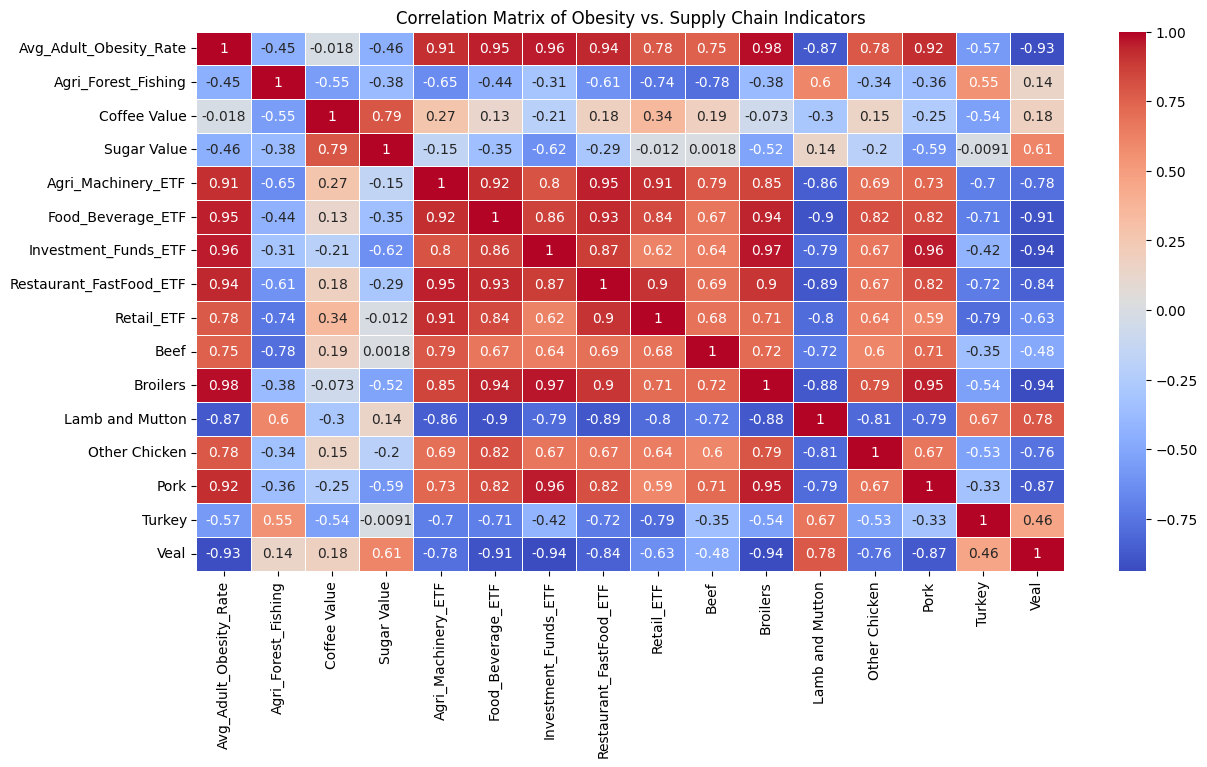

,Avg_Adult_Obesity_Rate,Agri_Forest_Fishing,Coffee Value,Sugar Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal
Avg_Adult_Obesity_Rate,1.000000,-0.452909,-0.017795,-0.458381,0.914790,0.953843,0.959045,0.935220,0.776924,0.751098,0.984454,-0.869173,0.781968,0.918936,-0.572556,-0.926410
Agri_Forest_Fishing,-0.452909,1.000000,-0.553308,-0.378475,-0.648212,-0.436787,-0.310038,-0.608895,-0.737752,-0.777449,-0.382413,0.604761,-0.335232,-0.357380,0.548268,0.137841
Coffee Value,-0.017795,-0.553308,1.000000,0.791591,0.267271,0.127038,-0.206524,0.176059,0.343089,0.190328,-0.072673,-0.296753,0.150244,-0.248131,-0.540413,0.182093
Sugar Value,-0.458381,-0.378475,0.791591,1.000000,-0.150191,-0.347593,-0.624928,-0.287271,-0.012177,0.001764,-0.519241,0.142690,-0.199345,-0.591798,-0.009126,0.607605
Agri_Machinery_ETF,0.914790,-0.648212,0.267271,-0.150191,1.000000,0.921145,0.796383,0.947376,0.914246,0.786326,0.850857,-0.857982,0.693899,0.729117,-0.704876,-0.776078
Food_Beverage_ETF,0.953843,-0.436787,0.127038,-0.347593,0.921145,1.000000,0.862322,0.928124,0.837565,0.668041,0.943954,-0.904731,0.815243,0.819450,-0.706605,-0.905661
Investment_Funds_ETF,0.959045,-0.310038,-0.206524,-0.624928,0.796383,0.862322,1.000000,0.873761,0.621223,0.644320,0.965322,-0.793097,0.668852,0.960089,-0.424216,-0.936187
Restaurant_FastFood_ETF,0.935220,-0.608895,0.176059,-0.287271,0.947376,0.928124,0.873761,1.000000,0.901733,0.691742,0.895125,-0.888423,0.670556,0.815933,-0.724040,-0.840595
Retail_ETF,0.776924,-0.737752,0.343089,-0.012177,0.914246,0.837565,0.621223,0.901733,1.000000,0.684483,0.709574,-0.797776,0.644265,0.592094,-0.788865,-0.630912
Beef,0.751098,-0.777449,0.190328,0.001764,0.786326,0.668041,0.644320,0.691742,0.684483,1.000000,0.716632,-0.721372,0.601994,0.713715,-0.351669,-0.484277


In [185]:
def plt_corr_matrix(df, question):
    numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Year'])    
    corr_matrix = numeric_df.corr()
    
    plt.figure(figsize=(14, 7))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix of {question}')
    plt.show()
    
    return corr_matrix

plt_corr_matrix(final_merge_df, "Obesity vs. Supply Chain Indicators")

## Determine Feature Importance and Train Model

In [190]:
X = final_merge_df.drop(columns=['Avg_Adult_Obesity_Rate', 'Year'])
Y = final_merge_df['Avg_Adult_Obesity_Rate']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

loo = LeaveOneOut()
predictions = []
actuals = []
coefficients = []

for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, Y_train)
    
    y_pred = ridge.predict(X_test)
    predictions.append(y_pred[0])
    actuals.append(Y_test.values[0])
    
    coefficients.append(ridge.coef_)

mse = mean_squared_error(actuals, predictions)
print(f'Mean Squared Error (LOOCV): {mse}')

coefficients_df = pd.DataFrame(coefficients, columns=X.columns)

coefficients_mean = coefficients_df.mean()
coefficients_std = coefficients_df.std()

importance_summary = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient Mean': coefficients_mean,
    'Coefficient Std': coefficients_std,
    'Absolute Coefficient Mean': np.abs(coefficients_mean)
}).sort_values(by='Absolute Coefficient Mean', ascending=False)

print(importance_summary)

#Adding ETFs improves MSE from %24.222 to %8.92 :D

Mean Squared Error (LOOCV): 0.08923432421079715
                                         Feature  Coefficient Mean  \
Investment_Funds_ETF        Investment_Funds_ETF          0.311678   
Agri_Machinery_ETF            Agri_Machinery_ETF          0.284765   
Beef                                        Beef          0.243455   
Veal                                        Veal         -0.233962   
Broilers                                Broilers          0.230817   
Restaurant_FastFood_ETF  Restaurant_FastFood_ETF          0.198898   
Food_Beverage_ETF              Food_Beverage_ETF          0.195293   
Other Chicken                      Other Chicken          0.137847   
Sugar Value                          Sugar Value         -0.137003   
Pork                                        Pork          0.130982   
Lamb and Mutton                  Lamb and Mutton          0.048436   
Turkey                                    Turkey         -0.035776   
Coffee Value                        Coffee